In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv')
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [3]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

Text(0, 0.5, 'No of People')

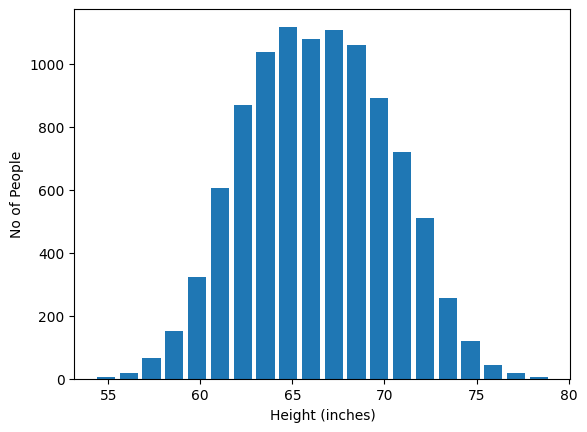

In [4]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel("Height (inches)")
plt.ylabel("No of People")

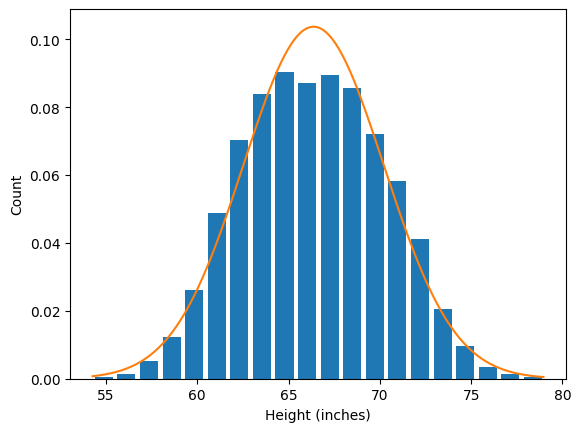

In [5]:

from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('No of People')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [6]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [7]:
lower_limit = df.height.mean() - 3*df.height.std()
lower_limit

54.824975392479274

In [8]:
df[ (df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [9]:
df_no_outlier_std_dev = df[ (df.height>lower_limit) & (df.height<upper_limit)]

In [10]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

###     z score =   ( x - mean ) / std

In [11]:
df['zscore'] = (df['height'] - df['height'].mean())/df['height'].std() 

In [12]:
df

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [13]:
df[df.zscore>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [14]:
df[df.zscore<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [15]:
df_no_outlier_zscore = df[(df.zscore>-3) & (df.zscore<3)] 

In [16]:
df_no_outlier_zscore

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [17]:
df.shape[0] - df_no_outlier_zscore.shape[0]

7